In [1]:
## Plot Coherence of Ifgram Stack: 1) coherence matrix and 2) network configuration

import os
import matplotlib.pyplot as plt
import pysar.plot_network as pnet
from pysar.simulation.plot import *
from pysar.objects import sensor
from pysar.utils import readfile, plot as pp


work_dir = '~/insarlab/PYSAR_EXAMPLE/AlcedoSenDT128/PYSAR'
work_dir = '~/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR'

work_dir = os.path.expanduser(work_dir)
os.chdir(work_dir)
print('Go to diretory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

inps = pnet.cmd_line_parse([''])
inps.file = './INPUTS/ifgramStack.h5'
inps.maskFile = 'waterMask.h5'
inps.coh_thres = 0.7
inps = pnet.read_network_info(inps)
print('Done.')

Go to diretory: /Users/yunjunz/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR
reading temporal/spatial baselines from ifgramStack file: ./INPUTS/ifgramStack.h5
number of acquisitions: 22
reading interferograms info from file: ./INPUTS/ifgramStack.h5
number of interferograms: 228
--------------------------------------------------
number of interferograms marked as drop: 97
number of interferograms marked as keep: 131
number of acquisitions marked as drop: 0
ifgramStack_coherence_spatialAvg.txt exists and is newer than ['./INPUTS/ifgramStack.h5', 'waterMask.h5'], skip updating.
ifgramStack_coherence_spatialAvg.txt already exists, read it directly
Done.


max perpendicular baseline: 1799.35 m
max temporal      baseline: 1518.0 days
showing coherence
colormap: RdBu
display range: [0.2, 1.0]
data    range: [0.2491, 0.998]
color jump at 0.7


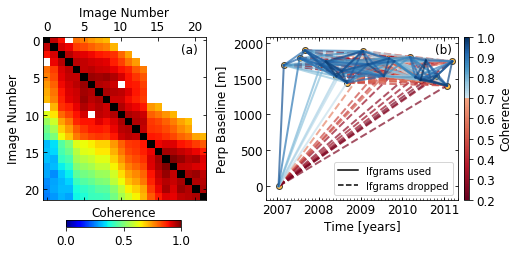

In [2]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[8, 3])
inps.cbar_label = 'Coherence'
inps.disp_title = False
inps.disp_cbar = False
inps.markersize = 6
inps.legend_loc = (0.15, 0.1)
inps.disp_legend = False

inps.disp_drop = True
ax[0], im = pp.plot_coherence_matrix(ax[0], inps.date12List, inps.cohList,
                                     date12List_drop=inps.date12List_drop,
                                     plot_dict=dict(vars(inps)))
ax[0].xaxis.tick_top()
ax[0].xaxis.set_label_position("top")
ax[0].tick_params(which='both', direction='in', labelsize=font_size,
                  bottom=True, top=True, left=True, right=True)

# colorbar
cax = fig.add_axes([0.20, 0.0, 0.2, 0.03])
cbar = plt.colorbar(im, cax=cax, ticks=[0., 0.5, 1.], orientation='horizontal')
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label('Coherence', fontsize=font_size)
cax.xaxis.set_label_position("top")

ax[1] = pp.plot_network(ax[1], inps.date12List, inps.dateList, inps.pbaseList,
                        dict(vars(inps)), inps.date12List_drop)
plt.subplots_adjust(wspace=0.2)

ax[0].annotate('(a)', xy=(0.85, 0.90), color='k', xycoords='axes fraction', fontsize=font_size)
ax[1].annotate('(b)', xy=(0.88, 0.90), color='k', xycoords='axes fraction', fontsize=font_size)

#fig.savefig('{}_net_coh.png'.format(proj_name), bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()